In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_2019 = pd.read_csv('data_2019_update.csv')

In [6]:
df_2019.head()


,trip_distance,fare_amount,extra,tip_amount,total_amount,time_trip
0,6.6,21.5,3.0,5.05,30.35,1174.0
1,0.6,4.5,3.0,1.65,9.95,199.0
2,1.8,8.0,3.0,2.35,14.15,492.0
3,2.0,9.0,0.5,2.05,12.35,608.0
4,1.0,6.0,0.5,0.00,7.30,356.0


# Кластеризация

In [7]:
from sklearn.preprocessing import StandardScaler, Normalizer

Масштабирование инормализация данных

In [8]:
scal = StandardScaler()
norm = Normalizer()
df_for_pca_2019 = pd.DataFrame(norm.fit_transform(scal.fit_transform(df_2019)), columns=df_2019.columns, index=df_2019.index)

In [8]:
from sklearn.decomposition import PCA

Понижаем разверность

In [10]:
pca = PCA(n_components=2)
for_cluster_2019 = pca.fit_transform(df_for_pca_2019)

In [29]:
from sklearn.cluster import KMeans

Цвета для кластеров

In [9]:
colors_for_cluster = ["red", "green", "blue"]

Посмотрим количество кластеров с помощью метода локтя  


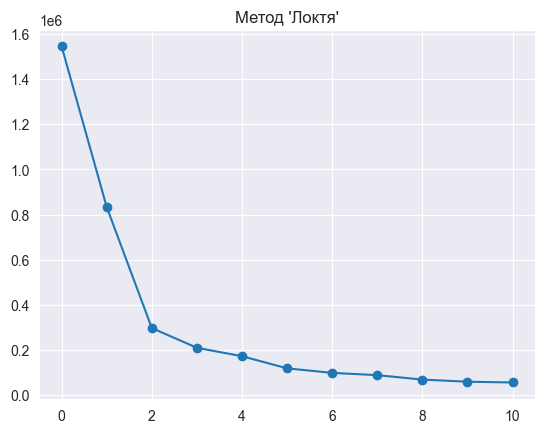

In [13]:
list_for_elbow = []
for n_clusters in range(1,12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
    kmeans.fit(for_cluster_2019)
    list_for_elbow.append(kmeans.inertia_)
plt.title("Метод 'Локтя'")
plt.plot(list_for_elbow, marker='o')

Будем брать 3 кластера  

In [10]:
n_cluster = 3

Функция для просмотра данных в распределенных кластерах

In [18]:
def info_clusters(df):
    for cluster in range(n_cluster):
        print("Кластер ",cluster)
        print("Цвет ",colors_for_cluster[cluster])

        for column in df.columns:
            if column == "cluster":
                continue
            print(column," max: ", round(df[column].where(df["cluster"] == cluster).dropna().max(),2), " min: ", round(df[column].where(df["cluster"] == cluster).dropna().min(),2),
                  " mean: ", round(df[column].where(df["cluster"] == cluster).dropna().mean(),2))

За метрику определения лучшего кластеризватора возьмем Индекс Дэвиса–Булдина, более низкие его значения указывают на лучший результат кластеризации

In [16]:
from sklearn.metrics import davies_bouldin_score

Функции для удобного просмотра кластеризаторов  

In [27]:
def kmeans_show(df):
    scal = StandardScaler()
    norm = Normalizer()
    df_for_pca = pd.DataFrame(norm.fit_transform(scal.fit_transform(df)), columns=df.columns, index=df.index)
    
    pca = PCA(n_components=2)
    for_cluster = pca.fit_transform(df_for_pca)
    
    kmean = KMeans(n_clusters=n_cluster, random_state=1337)
    kmean.fit(for_cluster)
    
    labels = kmean.labels_
    for cluster in range(n_cluster):
        plt.scatter(for_cluster[labels == cluster][:, 0], for_cluster[labels == cluster][:, 1], color=colors_for_cluster[cluster])
    
    print(davies_bouldin_score(for_cluster, labels))
    
    df["cluster"] = labels
    info_clusters(df)

In [23]:
from sklearn.cluster import Birch

In [24]:
def Birch_show(df):
    scal = StandardScaler()
    norm = Normalizer()
    df_for_pca = pd.DataFrame(norm.fit_transform(scal.fit_transform(df)), columns=df.columns, index=df.index)
    
    pca = PCA(n_components=2)
    for_cluster = pca.fit_transform(df_for_pca)
    
    model = Birch(n_clusters=n_cluster)
    model.fit(for_cluster)
    
    labels = model.labels_
    for cluster in range(n_cluster):
        plt.scatter(for_cluster[labels == cluster][:, 0], for_cluster[labels == cluster][:, 1], color=colors_for_cluster[cluster])
    
    print(davies_bouldin_score(for_cluster, labels))
    
    df["cluster"] = labels
    info_clusters(df)

In [25]:
from sklearn.mixture import GaussianMixture


In [14]:
def gaussian_mixture_show(df):
    from sklearn.gaussian_process.kernels import RBF

    scal = StandardScaler()
    norm = Normalizer()
    df_for_pca = pd.DataFrame(norm.fit_transform(scal.fit_transform(df)), columns=df.columns, index=df.index)
    
    pca = PCA(n_components=2)
    for_cluster = pca.fit_transform(df_for_pca)
    
    model = GaussianMixture(n_components=n_cluster)
    model.fit(for_cluster)
    
    labels = model.predict(for_cluster)
    for cluster in range(n_cluster):
        plt.scatter(for_cluster[labels == cluster][:, 0], for_cluster[labels == cluster][:, 1], color=colors_for_cluster[cluster])
    
    print(davies_bouldin_score(for_cluster, labels))
    
    df["cluster"] = labels
    info_clusters(df)

### KMeans

0.5133657873611955
Кластер  0
Цвет  red
trip_distance  max:  157.8  min:  0.0  mean:  7.55
fare_amount  max:  756.0  min:  0.0  mean:  28.56
extra  max:  9.5  min:  0.0  mean:  0.72
tip_amount  max:  400.0  min:  0.0  mean:  4.91
total_amount  max:  766.8  min:  0.0  mean:  38.34
time_trip  max:  86392.0  min:  0.0  mean:  2818.65
Кластер  1
Цвет  green
trip_distance  max:  18.7  min:  0.0  mean:  1.73
fare_amount  max:  52.0  min:  0.0  mean:  9.75
extra  max:  87.56  min:  1.3  mean:  2.78
tip_amount  max:  14.49  min:  0.0  mean:  1.7
total_amount  max:  140.36  min:  2.5  mean:  15.04
time_trip  max:  17357.0  min:  0.0  mean:  723.07
Кластер  2
Цвет  blue
trip_distance  max:  15.1  min:  0.0  mean:  1.43
fare_amount  max:  26.0  min:  0.0  mean:  8.37
extra  max:  1.3  min:  0.0  mean:  0.26
tip_amount  max:  10.0  min:  0.0  mean:  1.4
total_amount  max:  33.17  min:  0.0  mean:  13.15
time_trip  max:  42771.0  min:  0.0  mean:  598.44


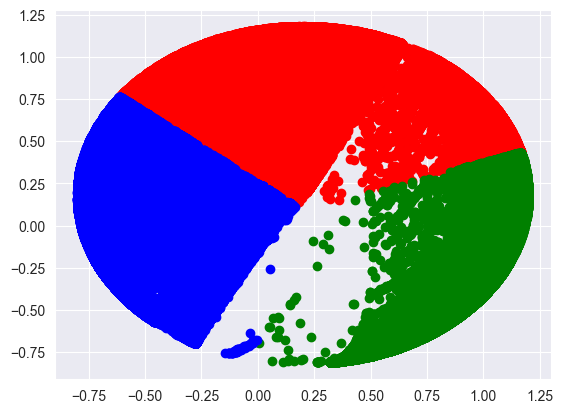

In [30]:
kmeans_show(df_2019.copy())

### Birch

0.5007215088292014
Кластер  0
Цвет  red
trip_distance  max:  22.3  min:  0.0  mean:  1.63
fare_amount  max:  35.0  min:  0.0  mean:  9.16
extra  max:  1.3  min:  0.0  mean:  0.26
tip_amount  max:  15.0  min:  0.0  mean:  1.54
total_amount  max:  54.4  min:  0.0  mean:  14.07
time_trip  max:  86392.0  min:  0.0  mean:  798.63
Кластер  1
Цвет  green
trip_distance  max:  18.7  min:  0.0  mean:  1.67
fare_amount  max:  52.0  min:  0.0  mean:  9.54
extra  max:  87.56  min:  1.3  mean:  2.78
tip_amount  max:  14.49  min:  0.0  mean:  1.66
total_amount  max:  140.36  min:  2.5  mean:  14.78
time_trip  max:  17357.0  min:  0.0  mean:  706.62
Кластер  2
Цвет  blue
trip_distance  max:  157.8  min:  0.0  mean:  8.76
fare_amount  max:  756.0  min:  0.0  mean:  32.18
extra  max:  9.5  min:  0.0  mean:  0.94
tip_amount  max:  400.0  min:  0.0  mean:  5.55
total_amount  max:  766.8  min:  0.0  mean:  43.03
time_trip  max:  86390.0  min:  0.0  mean:  2863.32


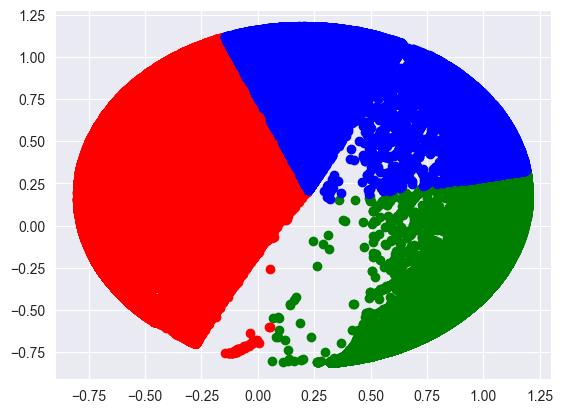

In [25]:
Birch_show(df_2019.copy())

### GausianMixture

0.7008391181392156
Кластер  0
Цвет  red
trip_distance  max:  6.0  min:  0.0  mean:  1.39
fare_amount  max:  52.0  min:  0.0  mean:  8.4
extra  max:  87.56  min:  1.3  mean:  2.78
tip_amount  max:  5.0  min:  0.0  mean:  1.45
total_amount  max:  140.36  min:  2.5  mean:  13.43
time_trip  max:  4114.0  min:  0.0  mean:  606.17
Кластер  1
Цвет  green
trip_distance  max:  5.8  min:  0.0  mean:  1.22
fare_amount  max:  17.0  min:  0.0  mean:  7.42
extra  max:  1.3  min:  0.0  mean:  0.26
tip_amount  max:  4.2  min:  0.0  mean:  1.24
total_amount  max:  26.8  min:  0.0  mean:  12.02
time_trip  max:  7743.0  min:  0.0  mean:  507.52
Кластер  2
Цвет  blue
trip_distance  max:  157.8  min:  0.0  mean:  5.8
fare_amount  max:  756.0  min:  0.0  mean:  23.28
extra  max:  9.5  min:  0.0  mean:  0.87
tip_amount  max:  400.0  min:  0.0  mean:  4.0
total_amount  max:  766.8  min:  0.0  mean:  31.65
time_trip  max:  86392.0  min:  0.0  mean:  2199.25


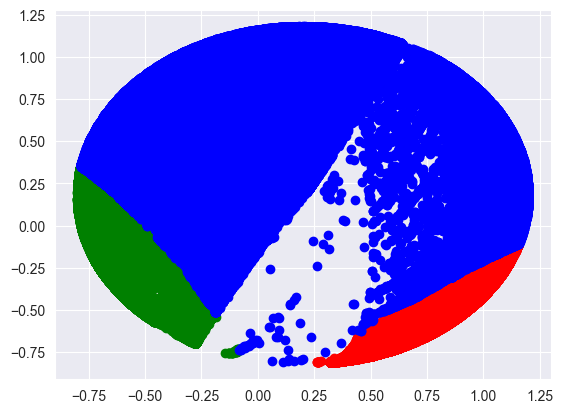

In [20]:
gaussian_mixture_show(df_2019.copy())

Из проанализированных моделей, по выбраному рейтингу, возьмем кластеризатор kmeans

Описание кластеров в выбраном кластеризаторе

Кластер 0 под красным цветом распределны длинные поездки со средним количеством  доплаты за поездку

Кластер 1 средняя дистанция поездки большой объем доплаты

Кластер 2 маленькая дистанция поездок с минимальным количеством доплаты 

*Остальные колонки счетов и временем свзаны с дистанцией поездки 